Initialization and Regularization on Cat vs Non-cat Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/mscML2025_pankaj/Initialization')

Mounted at /content/drive/


###Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_cat_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# The load_cat_dataset function likely returns 5 values (including classes)
train_X, train_Y, test_X, test_Y, classes = load_cat_dataset()

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")

    Returns:
    parameters -- parameters learnt by the model
    """

    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]

    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)

        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

###Zero initialization

In [4]:
# GRADED FUNCTION: initialize_parameters_zeros

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """

    parameters = {}
    L = len(layers_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6444151571406833
Cost after iteration 2000: 0.6439784295472034
Cost after iteration 3000: 0.6439737889407632
Cost after iteration 4000: 0.6439737386059642
Cost after iteration 5000: 0.6439737380588201
Cost after iteration 6000: 0.6439737380528714
Cost after iteration 7000: 0.6439737380528066
Cost after iteration 8000: 0.6439737380528056
Cost after iteration 9000: 0.6439737380528059
Cost after iteration 10000: 0.6439737380528057
Cost after iteration 11000: 0.6439737380528056
Cost after iteration 12000: 0.6439737380528059
Cost after iteration 13000: 0.6439737380528059
Cost after iteration 14000: 0.6439737380528059


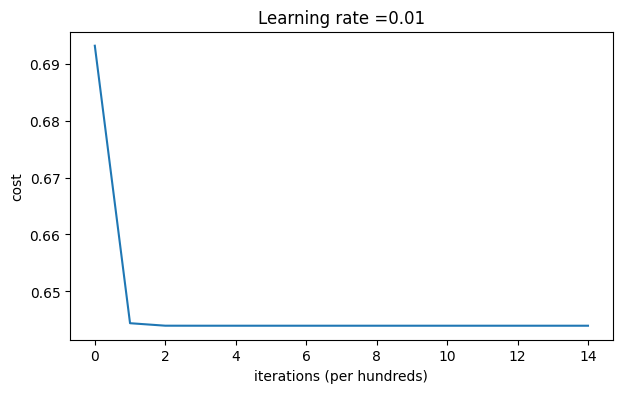

On the train set:
Accuracy: 0.6555023923444976
On the test set:
Accuracy: 0.34


In [6]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [7]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


###Random initialization

In [8]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """

    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

In [9]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


In [ ]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Cost after iteration 0: inf


/content/drive/MyDrive/mscML2025_pankaj/Initialization/init_utils.py:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
/content/drive/MyDrive/mscML2025_pankaj/Initialization/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/content/drive/MyDrive/mscML2025_pankaj/Initialization/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 1000: 0.6229575088636773
Cost after iteration 2000: 0.622482936925185
Cost after iteration 3000: 0.6224771595865887
Cost after iteration 4000: 0.6224770815313617
Cost after iteration 5000: 0.6224770742294082
Cost after iteration 6000: 0.6224770678617507
Cost after iteration 7000: 0.6224770615596321


In [ ]:
print (predictions_train)
print (predictions_test)

###He initialization

In [ ]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1  # number of layers

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2. / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

In [ ]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

In [ ]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

</tr>
    <td>
    3-layer NN with zeros initialization - 34%
    </td>
<tr>
    <td>
    3-layer NN with large random initialization - 34%
    </td>
</tr>
<tr>
    <td>
    3-layer NN with He initialization - 76%
    </td>
    <td>
    recommended method
    </td>
</tr>

###Regularization


Apply Regularization on He_Initialized model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys, numpy as np, h5py, matplotlib.pyplot as plt
base_dir = '/content/drive/MyDrive/Colab Notebooks/Initialization'
sys.path.append(base_dir)

from init_utils import sigmoid, relu, compute_loss, predict
from reg_utils import forward_propagation, backward_propagation, update_parameters

#load cat vs non-cat dataset
def load_cat_dataset_from_drive(base_dir):
    train_path = os.path.join(base_dir, 'train_catvnoncat.h5')
    test_path  = os.path.join(base_dir, 'test_catvnoncat.h5')
    train_dataset = h5py.File(train_path, "r")
    test_dataset  = h5py.File(test_path, "r")
    train_x_orig = np.array(train_dataset["train_set_x"][:])
    train_y_orig = np.array(train_dataset["train_set_y"][:])
    test_x_orig  = np.array(test_dataset["test_set_x"][:])
    test_y_orig  = np.array(test_dataset["test_set_y"][:])
    train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
    test_x  = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
    train_y = train_y_orig.reshape(1, train_y_orig.shape[0])
    test_y  = test_y_orig.reshape(1, test_y_orig.shape[0])
    return train_x, train_y, test_x, test_y

train_X, train_Y, test_X, test_Y = load_cat_dataset_from_drive(base_dir)
print("Loaded shapes:", train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

# He Initialization

def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2. / layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

# L2 Regularization
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    m = Y.shape[1]
    W1, W2, W3 = parameters["W1"], parameters["W2"], parameters["W3"]
    cross_entropy_cost = compute_loss(A3, Y)
    L2_regularization_cost = (lambd/(2*m))*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    return cross_entropy_cost + L2_regularization_cost

def backward_propagation_with_regularization(X, Y, cache, lambd):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    dZ3 = A3 - Y
    dW3 = (1/m)*np.dot(dZ3, A2.T) + (lambd/m)*W3
    db3 = (1/m)*np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1/m)*np.dot(dZ2, A1.T) + (lambd/m)*W2
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1/m)*np.dot(dZ1, X.T) + (lambd/m)*W1
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return grads

# Dropout Regularization
def forward_propagation_with_dropout(X, parameters, keep_prob=0.8):
    np.random.seed(1)
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    W3, b3 = parameters["W3"], parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1]) < keep_prob
    A1 = (A1 * D1) / keep_prob

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1]) < keep_prob
    A2 = (A2 * D2) / keep_prob

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    return A3, cache

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    dZ3 = A3 - Y
    dW3 = (1/m)*np.dot(dZ3, A2.T)
    db3 = (1/m)*np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3) * D2 / keep_prob
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2) * D1 / keep_prob
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return grads

# Train He-Initialized Model
def model(X, Y, layers_dims, reg_type=None, lambd=0, keep_prob=1.0, learning_rate=0.0075, num_iterations=10000):
    parameters = initialize_parameters_he(layers_dims)
    costs = []
    for i in range(num_iterations):
        if reg_type == "dropout":
            A3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
            cost = compute_loss(A3, Y)
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        else:
            A3, cache = forward_propagation(X, parameters)
            if reg_type == "l2":
                cost = compute_cost_with_regularization(A3, Y, parameters, lambd)
                grads = backward_propagation_with_regularization(X, Y, cache, lambd)
            else:
                cost = compute_loss(A3, Y)
                grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i % 1000 == 0:
            costs.append(cost)
            print(f"Iter {i}: Cost = {cost:.5f}")
    return parameters, costs

# Run models with He initialization + Regularization
layers_dims = [train_X.shape[0], 10, 5, 1]

print("\n▶ He Initialization (no regularization)")
params_he, cost_he = model(train_X, train_Y, layers_dims)

print("\n▶ He + L2 Regularization (λ=0.7)")
params_l2, cost_l2 = model(train_X, train_Y, layers_dims, reg_type="l2", lambd=0.7)

print("\n▶ He + Dropout (keep_prob=0.8)")
params_drop, cost_drop = model(train_X, train_Y, layers_dims, reg_type="dropout", keep_prob=0.8)

# Compare Cost Curves
plt.figure(figsize=(8,6))
plt.plot(cost_he, label="He Initialization")
plt.plot(cost_l2, label="He + L2 Regularization")
plt.plot(cost_drop, label="He + Dropout")
plt.xlabel("Iterations (×1000)")
plt.ylabel("Cost")
plt.title("He Initialization vs Regularization (Cat vs Non-Cat)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
print("\n=== Accuracy Comparison ===")
print("\nHe Initialization:")
predict(train_X, train_Y, params_he)
predict(test_X, test_Y, params_he)

print("\nHe + L2 Regularization:")
predict(train_X, train_Y, params_l2)
predict(test_X, test_Y, params_l2)

print("\nHe + Dropout:")
predict(train_X, train_Y, params_drop)
predict(test_X, test_Y, params_drop)
